# Principal Component Analysis (PCA)


In [2]:
%load_ext autoreload
%autoreload

# Imports
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA

import sys
sys.path.append("../utils")
from utils import PCA_reduction, PCA_components, PCA_snapshot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let's prepare the data for PCA. PCA is effected by scale so we need to scale the features in the data before applying PCA. We can transform the data onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. StandardScaler helps standardize the dataset’s features.
Notice the code below has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [3]:
PCA_reduction('../../dumps/various_sizes/16K.csv','neigh')

Variance      Training acc    Test acc  Components      Time (s)
----------  --------------  ----------  ------------  ----------
no pca            0.980355    0.979738  all            0.0816874
1                 0.99314     0.99283   119            0.0958887
0.99              0.99314     0.993454  102            0.0810365
0.95              0.993296    0.993454  82             0.0633606
0.9               0.99314     0.993454  64             0.0591346
0.85              0.99314     0.993454  52             0.0395839


It's interesting to notice that we can improve the accuracies while gathering our features from a set of 119 to 52 and  improve the timing. Here we're using quite a small dataset (16k), but it makes no doubt that the saved time is significant with even more samples.

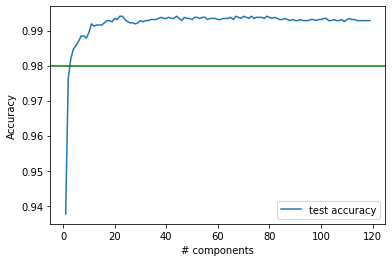

Top 5 combinations of features : 

# components      Test accuracy    Time (s)    Fixed cost (s)
--------------  ---------------  ----------  ----------------
no PCA                 0.979738   0.0732165
22                     0.994077   0.0278001         0.0877844
23                     0.994077   0.0253671         0.0914995
44                     0.994077   0.0370188         0.136984
67                     0.994077   0.0584236         0.207695
70                     0.994077   0.0568195         0.205825


22

In [3]:
PCA_components('../../dumps/various_sizes/16K.csv','neigh')

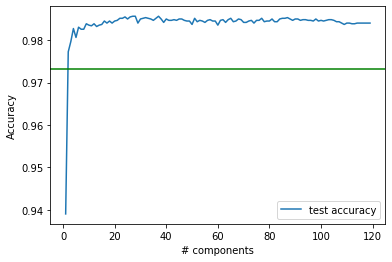

Top 5 combinations of features : 

# components      Test accuracy    Time (s)    Fixed cost (s)
--------------  ---------------  ----------  ----------------
no PCA                 0.973226   0.315086
27                     0.985645   0.0670233          0.210888
28                     0.985645   0.0647931          0.218169
37                     0.985645   0.0771091          0.252586
24                     0.985484   0.0513533          0.190763
26                     0.985484   0.0602244          0.202537
Accuracy on training set: 0.976
Accuracy on test set: 0.951


In [4]:
PCA_snapshot('../../dumps/time_analysis/threshold_3/3_20190615_31000.csv','neigh','../')